# Tree Based Models

In this notebook, we will model the relation between weather data and adjusted bike trips using decision tree regression model, as well as boosting algorithm based on decision trees.

## Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

In [3]:
# import training data
bike_train = pd.read_csv('../EDA/bikeshare_train_data_v2.csv', parse_dates=['Date'])

In [4]:
# bike_train['adj_num_trips'] = bike_train['num_trips']/bike_train['trend']

In [5]:

bike_test = pd.read_csv('../EDA/bikeshare_test_data_v2.csv', parse_dates=['Date'])

In [6]:
# bike_test['adj_num_trips'] = bike_test['num_trips']/bike_test['trend']/1000

In [7]:
# sns.scatterplot(x=bike_train['Date'], y=bike_train['adj_num_trips'])
# sns.scatterplot(x=bike_test['Date'], y=bike_test['adj_num_trips'])
# plt.show()

## Decision Tree Regressor

We first build a decision tree regressor with feature set chosen from 'max_temp', 'hdd', 'total_precip'. These features are selected based on previous EDA.

In [9]:
features = ['max_temp', 'total_precip', 'day_length', 'snow_on_ground', 'max_gust']

In [10]:
# define powerset function to return all subset of a list

from itertools import chain, combinations

def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [11]:
from sklearn.tree import DecisionTreeRegressor

In [12]:
from sklearn.metrics import mean_squared_error

In [13]:
MAX_DEPTH = 10

In [14]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, random_state=16, shuffle=True)

In [15]:
mses_train = np.zeros((5,2**len(features)-1,MAX_DEPTH))
mses_val = np.zeros((5,2**len(features)-1,MAX_DEPTH))
# the first component refers to validation number, the second component refers to the feature used, 
# the third refers to the max_depth of the tree

In [16]:
cv_count = 0

for train_index, test_index in kfold.split(bike_train):
    feature_count = 0
    cv_train = bike_train.iloc[train_index]
    cv_val = bike_train.iloc[test_index]
    for feature in powerset(features):
        feature = list(feature)
        if len(feature) > 0:
            print('feature_count is ', feature_count)
            for max_depth in range(1,MAX_DEPTH+1):
                print(f'Fitting tree model with features {feature} and max depth {max_depth}')
                tree = DecisionTreeRegressor(max_depth = max_depth)
                tree.fit(cv_train[feature],cv_train['adj_num_trips'])
        
                # predict
                pred_train = tree.predict(cv_train[feature])
                pred_val = tree.predict(cv_val[feature])
                
                # compute mse and store
                mse_train = np.sqrt(mean_squared_error(cv_train['adj_num_trips'], pred_train))
                mse_val = np.sqrt(mean_squared_error(cv_val['adj_num_trips'], pred_val))
                mses_train[cv_count,feature_count,max_depth-1] = mse_train
                mses_val[cv_count,feature_count,max_depth-1] = mse_val
                
                # plot the in-sample and out-of-sample prediction with true values
#                 fig, ax = plt.subplots(1,2,figsize = (12,5))
#                 sns.scatterplot(x=bike_train['time'], y=bike_train['adj_num_trips'], ax=ax[0], color='blue', alpha=0.5)
#                 sns.scatterplot(x=bike_train['time'], y=pred_train, ax=ax[0], color='orange')
            
#                 sns.scatterplot(x=bike_test['time'], y=bike_test['adj_num_trips'], ax=ax[1], color='blue', alpha=0.5)
#                 sns.scatterplot(x=bike_test['time'], y=pred_test, ax=ax[1], color='orange') 
            
#                 plt.show()
            
                # plot the residue plot
            
#                 if len(feature) == 1:
                
#                     fig, ax = plt.subplots(1,2,figsize = (12,5))
#                     sns.scatterplot(x=bike_train[feature[0]], y=bike_train['adj_num_trips'] - pred_train, ax=ax[0], color='green')
#                     sns.scatterplot(x=bike_test[feature[0]], y=bike_test['adj_num_trips'] - pred_test, ax=ax[1], color='green')
#                     ax[0].set_title(f'Residue plot of adj_num_trips against {feature[0]} in training data')
#                     ax[1].set_title(f'Residue plot of adj_num_trips against {feature[0]} in testing data')
                
#                     plt.show()
            feature_count += 1
    cv_count += 1

feature_count is  0
Fitting tree model with features ['max_temp'] and max depth 1
Fitting tree model with features ['max_temp'] and max depth 2
Fitting tree model with features ['max_temp'] and max depth 3
Fitting tree model with features ['max_temp'] and max depth 4
Fitting tree model with features ['max_temp'] and max depth 5
Fitting tree model with features ['max_temp'] and max depth 6
Fitting tree model with features ['max_temp'] and max depth 7
Fitting tree model with features ['max_temp'] and max depth 8
Fitting tree model with features ['max_temp'] and max depth 9
Fitting tree model with features ['max_temp'] and max depth 10
feature_count is  1
Fitting tree model with features ['total_precip'] and max depth 1
Fitting tree model with features ['total_precip'] and max depth 2
Fitting tree model with features ['total_precip'] and max depth 3
Fitting tree model with features ['total_precip'] and max depth 4
Fitting tree model with features ['total_precip'] and max depth 5
Fitting t

Fitting tree model with features ['total_precip', 'max_gust'] and max depth 5
Fitting tree model with features ['total_precip', 'max_gust'] and max depth 6
Fitting tree model with features ['total_precip', 'max_gust'] and max depth 7
Fitting tree model with features ['total_precip', 'max_gust'] and max depth 8
Fitting tree model with features ['total_precip', 'max_gust'] and max depth 9
Fitting tree model with features ['total_precip', 'max_gust'] and max depth 10
feature_count is  12
Fitting tree model with features ['day_length', 'snow_on_ground'] and max depth 1
Fitting tree model with features ['day_length', 'snow_on_ground'] and max depth 2
Fitting tree model with features ['day_length', 'snow_on_ground'] and max depth 3
Fitting tree model with features ['day_length', 'snow_on_ground'] and max depth 4
Fitting tree model with features ['day_length', 'snow_on_ground'] and max depth 5
Fitting tree model with features ['day_length', 'snow_on_ground'] and max depth 6
Fitting tree model

Fitting tree model with features ['total_precip', 'day_length', 'max_gust'] and max depth 4
Fitting tree model with features ['total_precip', 'day_length', 'max_gust'] and max depth 5
Fitting tree model with features ['total_precip', 'day_length', 'max_gust'] and max depth 6
Fitting tree model with features ['total_precip', 'day_length', 'max_gust'] and max depth 7
Fitting tree model with features ['total_precip', 'day_length', 'max_gust'] and max depth 8
Fitting tree model with features ['total_precip', 'day_length', 'max_gust'] and max depth 9
Fitting tree model with features ['total_precip', 'day_length', 'max_gust'] and max depth 10
feature_count is  23
Fitting tree model with features ['total_precip', 'snow_on_ground', 'max_gust'] and max depth 1
Fitting tree model with features ['total_precip', 'snow_on_ground', 'max_gust'] and max depth 2
Fitting tree model with features ['total_precip', 'snow_on_ground', 'max_gust'] and max depth 3
Fitting tree model with features ['total_preci

Fitting tree model with features ['total_precip'] and max depth 3
Fitting tree model with features ['total_precip'] and max depth 4
Fitting tree model with features ['total_precip'] and max depth 5
Fitting tree model with features ['total_precip'] and max depth 6
Fitting tree model with features ['total_precip'] and max depth 7
Fitting tree model with features ['total_precip'] and max depth 8
Fitting tree model with features ['total_precip'] and max depth 9
Fitting tree model with features ['total_precip'] and max depth 10
feature_count is  2
Fitting tree model with features ['day_length'] and max depth 1
Fitting tree model with features ['day_length'] and max depth 2
Fitting tree model with features ['day_length'] and max depth 3
Fitting tree model with features ['day_length'] and max depth 4
Fitting tree model with features ['day_length'] and max depth 5
Fitting tree model with features ['day_length'] and max depth 6
Fitting tree model with features ['day_length'] and max depth 7
Fit

Fitting tree model with features ['snow_on_ground', 'max_gust'] and max depth 8
Fitting tree model with features ['snow_on_ground', 'max_gust'] and max depth 9
Fitting tree model with features ['snow_on_ground', 'max_gust'] and max depth 10
feature_count is  15
Fitting tree model with features ['max_temp', 'total_precip', 'day_length'] and max depth 1
Fitting tree model with features ['max_temp', 'total_precip', 'day_length'] and max depth 2
Fitting tree model with features ['max_temp', 'total_precip', 'day_length'] and max depth 3
Fitting tree model with features ['max_temp', 'total_precip', 'day_length'] and max depth 4
Fitting tree model with features ['max_temp', 'total_precip', 'day_length'] and max depth 5
Fitting tree model with features ['max_temp', 'total_precip', 'day_length'] and max depth 6
Fitting tree model with features ['max_temp', 'total_precip', 'day_length'] and max depth 7
Fitting tree model with features ['max_temp', 'total_precip', 'day_length'] and max depth 8
Fi

Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'snow_on_ground'] and max depth 6
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'snow_on_ground'] and max depth 7
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'snow_on_ground'] and max depth 8
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'snow_on_ground'] and max depth 9
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'snow_on_ground'] and max depth 10
feature_count is  26
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'max_gust'] and max depth 1
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'max_gust'] and max depth 2
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'max_gust'] and max depth 3
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'max_gust'] and max depth 4
Fitting tree

Fitting tree model with features ['max_temp', 'total_precip'] and max depth 8
Fitting tree model with features ['max_temp', 'total_precip'] and max depth 9
Fitting tree model with features ['max_temp', 'total_precip'] and max depth 10
feature_count is  6
Fitting tree model with features ['max_temp', 'day_length'] and max depth 1
Fitting tree model with features ['max_temp', 'day_length'] and max depth 2
Fitting tree model with features ['max_temp', 'day_length'] and max depth 3
Fitting tree model with features ['max_temp', 'day_length'] and max depth 4
Fitting tree model with features ['max_temp', 'day_length'] and max depth 5
Fitting tree model with features ['max_temp', 'day_length'] and max depth 6
Fitting tree model with features ['max_temp', 'day_length'] and max depth 7
Fitting tree model with features ['max_temp', 'day_length'] and max depth 8
Fitting tree model with features ['max_temp', 'day_length'] and max depth 9
Fitting tree model with features ['max_temp', 'day_length'] a

Fitting tree model with features ['max_temp', 'total_precip', 'max_gust'] and max depth 4
Fitting tree model with features ['max_temp', 'total_precip', 'max_gust'] and max depth 5
Fitting tree model with features ['max_temp', 'total_precip', 'max_gust'] and max depth 6
Fitting tree model with features ['max_temp', 'total_precip', 'max_gust'] and max depth 7
Fitting tree model with features ['max_temp', 'total_precip', 'max_gust'] and max depth 8
Fitting tree model with features ['max_temp', 'total_precip', 'max_gust'] and max depth 9
Fitting tree model with features ['max_temp', 'total_precip', 'max_gust'] and max depth 10
feature_count is  18
Fitting tree model with features ['max_temp', 'day_length', 'snow_on_ground'] and max depth 1
Fitting tree model with features ['max_temp', 'day_length', 'snow_on_ground'] and max depth 2
Fitting tree model with features ['max_temp', 'day_length', 'snow_on_ground'] and max depth 3
Fitting tree model with features ['max_temp', 'day_length', 'snow_

Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'max_gust'] and max depth 8
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'max_gust'] and max depth 9
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'max_gust'] and max depth 10
feature_count is  27
Fitting tree model with features ['max_temp', 'total_precip', 'snow_on_ground', 'max_gust'] and max depth 1
Fitting tree model with features ['max_temp', 'total_precip', 'snow_on_ground', 'max_gust'] and max depth 2
Fitting tree model with features ['max_temp', 'total_precip', 'snow_on_ground', 'max_gust'] and max depth 3
Fitting tree model with features ['max_temp', 'total_precip', 'snow_on_ground', 'max_gust'] and max depth 4
Fitting tree model with features ['max_temp', 'total_precip', 'snow_on_ground', 'max_gust'] and max depth 5
Fitting tree model with features ['max_temp', 'total_precip', 'snow_on_ground', 'max_gust'] and max depth 6
Fitting tree model

Fitting tree model with features ['max_temp', 'day_length'] and max depth 8
Fitting tree model with features ['max_temp', 'day_length'] and max depth 9
Fitting tree model with features ['max_temp', 'day_length'] and max depth 10
feature_count is  7
Fitting tree model with features ['max_temp', 'snow_on_ground'] and max depth 1
Fitting tree model with features ['max_temp', 'snow_on_ground'] and max depth 2
Fitting tree model with features ['max_temp', 'snow_on_ground'] and max depth 3
Fitting tree model with features ['max_temp', 'snow_on_ground'] and max depth 4
Fitting tree model with features ['max_temp', 'snow_on_ground'] and max depth 5
Fitting tree model with features ['max_temp', 'snow_on_ground'] and max depth 6
Fitting tree model with features ['max_temp', 'snow_on_ground'] and max depth 7
Fitting tree model with features ['max_temp', 'snow_on_ground'] and max depth 8
Fitting tree model with features ['max_temp', 'snow_on_ground'] and max depth 9
Fitting tree model with feature

Fitting tree model with features ['max_temp', 'day_length', 'snow_on_ground'] and max depth 8
Fitting tree model with features ['max_temp', 'day_length', 'snow_on_ground'] and max depth 9
Fitting tree model with features ['max_temp', 'day_length', 'snow_on_ground'] and max depth 10
feature_count is  19
Fitting tree model with features ['max_temp', 'day_length', 'max_gust'] and max depth 1
Fitting tree model with features ['max_temp', 'day_length', 'max_gust'] and max depth 2
Fitting tree model with features ['max_temp', 'day_length', 'max_gust'] and max depth 3
Fitting tree model with features ['max_temp', 'day_length', 'max_gust'] and max depth 4
Fitting tree model with features ['max_temp', 'day_length', 'max_gust'] and max depth 5
Fitting tree model with features ['max_temp', 'day_length', 'max_gust'] and max depth 6
Fitting tree model with features ['max_temp', 'day_length', 'max_gust'] and max depth 7
Fitting tree model with features ['max_temp', 'day_length', 'max_gust'] and max 

Fitting tree model with features ['max_temp', 'day_length', 'snow_on_ground', 'max_gust'] and max depth 8
Fitting tree model with features ['max_temp', 'day_length', 'snow_on_ground', 'max_gust'] and max depth 9
Fitting tree model with features ['max_temp', 'day_length', 'snow_on_ground', 'max_gust'] and max depth 10
feature_count is  29
Fitting tree model with features ['total_precip', 'day_length', 'snow_on_ground', 'max_gust'] and max depth 1
Fitting tree model with features ['total_precip', 'day_length', 'snow_on_ground', 'max_gust'] and max depth 2
Fitting tree model with features ['total_precip', 'day_length', 'snow_on_ground', 'max_gust'] and max depth 3
Fitting tree model with features ['total_precip', 'day_length', 'snow_on_ground', 'max_gust'] and max depth 4
Fitting tree model with features ['total_precip', 'day_length', 'snow_on_ground', 'max_gust'] and max depth 5
Fitting tree model with features ['total_precip', 'day_length', 'snow_on_ground', 'max_gust'] and max depth 6


Fitting tree model with features ['total_precip', 'day_length'] and max depth 10
feature_count is  10
Fitting tree model with features ['total_precip', 'snow_on_ground'] and max depth 1
Fitting tree model with features ['total_precip', 'snow_on_ground'] and max depth 2
Fitting tree model with features ['total_precip', 'snow_on_ground'] and max depth 3
Fitting tree model with features ['total_precip', 'snow_on_ground'] and max depth 4
Fitting tree model with features ['total_precip', 'snow_on_ground'] and max depth 5
Fitting tree model with features ['total_precip', 'snow_on_ground'] and max depth 6
Fitting tree model with features ['total_precip', 'snow_on_ground'] and max depth 7
Fitting tree model with features ['total_precip', 'snow_on_ground'] and max depth 8
Fitting tree model with features ['total_precip', 'snow_on_ground'] and max depth 9
Fitting tree model with features ['total_precip', 'snow_on_ground'] and max depth 10
feature_count is  11
Fitting tree model with features ['t

Fitting tree model with features ['total_precip', 'day_length', 'snow_on_ground'] and max depth 7
Fitting tree model with features ['total_precip', 'day_length', 'snow_on_ground'] and max depth 8
Fitting tree model with features ['total_precip', 'day_length', 'snow_on_ground'] and max depth 9
Fitting tree model with features ['total_precip', 'day_length', 'snow_on_ground'] and max depth 10
feature_count is  22
Fitting tree model with features ['total_precip', 'day_length', 'max_gust'] and max depth 1
Fitting tree model with features ['total_precip', 'day_length', 'max_gust'] and max depth 2
Fitting tree model with features ['total_precip', 'day_length', 'max_gust'] and max depth 3
Fitting tree model with features ['total_precip', 'day_length', 'max_gust'] and max depth 4
Fitting tree model with features ['total_precip', 'day_length', 'max_gust'] and max depth 5
Fitting tree model with features ['total_precip', 'day_length', 'max_gust'] and max depth 6
Fitting tree model with features [

Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'snow_on_ground', 'max_gust'] and max depth 10


In [17]:
# compute the average of rmses
avg_rmses_train = np.zeros((2**len(features)-1,MAX_DEPTH))
avg_rmses_val = np.zeros((2**len(features)-1,MAX_DEPTH))
for i in range(2**len(features)-1):
    for j in range(MAX_DEPTH):
        avg_rmses_train[i,j] = mses_train[:,i,j].mean()
        avg_rmses_val[i,j] = mses_val[:,i,j].mean()

In [18]:
ind_train = np.unravel_index(np.argmin(avg_rmses_train, axis=None), avg_rmses_train.shape)
ind_val = np.unravel_index(np.argmin(avg_rmses_val, axis=None), avg_rmses_val.shape)
print('The minimum training rmse occurs when (feature_count, max_depth) = ', ind_train)
print('The minimum validation rmse occurs when (feature_count, max_depth) = ', ind_val)

The minimum training rmse occurs when (feature_count, max_depth) =  (26, 9)
The minimum validation rmse occurs when (feature_count, max_depth) =  (16, 5)


The minimum average rmse on validation set happens when max_depth = 6 and the features used are ['max_temp', 'total_precip']

In [19]:
print('The minimum validation rmse is', avg_rmses_val[ind_val])
print('The training rmse of the tree above is', avg_rmses_train[ind_val])

The minimum validation rmse is 475.021002875403
The training rmse of the tree above is 424.66703124105806


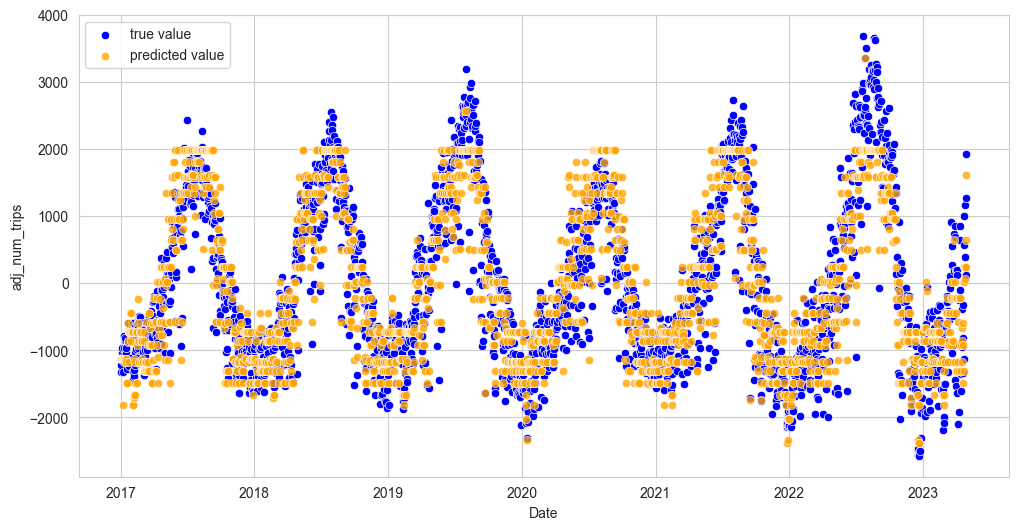

In [20]:
tree = DecisionTreeRegressor(max_depth = 6)
tree.fit(bike_train[['max_temp','total_precip']],bike_train['adj_num_trips'])
pred = tree.predict(bike_train[['max_temp','total_precip']])
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x=bike_train['Date'], y=bike_train['adj_num_trips'], color='blue', ax=ax, label='true value')
sns.scatterplot(x=bike_train['Date'], y=pred, color='orange', ax=ax, alpha=0.8, label='predicted value')

plt.legend()
plt.show()

We see that the model does not entirely capture the increasing amplitude.

In [21]:
bike_train['interaction_1'] = bike_train['trend'] * bike_train['max_temp']
bike_train['interaction_2'] = bike_train['trend'] * bike_train['total_precip']

In [32]:
features = ['max_temp', 'total_precip', 'day_length', 'snow_on_ground', 'max_gust']

In [33]:
rmses_train_int = np.zeros((5,2**len(features)-1,MAX_DEPTH))
rmses_val_int = np.zeros((5,2**len(features)-1,MAX_DEPTH))
# the first component refers to validation number, the second component refers to the feature used, 
# the third refers to the max_depth of the tree

In [34]:
cv_count = 0

for train_index, test_index in kfold.split(bike_train):
    feature_count = 0
    cv_train = bike_train.iloc[train_index]
    cv_val = bike_train.iloc[test_index]
    for feature in powerset(features):
        feature = list(feature)
        if len(feature) > 0:
            print('feature_count is ', feature_count)
            for max_depth in range(1,MAX_DEPTH+1):
                print(f'Fitting tree model with features {feature} and max depth {max_depth}')
                tree = DecisionTreeRegressor(max_depth = max_depth, random_state = 16)
                tree.fit(cv_train[feature],cv_train['adj_num_trips'])
        
                # predict
                pred_train = tree.predict(cv_train[feature])
                pred_val = tree.predict(cv_val[feature])
                
                # compute mse and store
                rmse_train_int = np.sqrt(mean_squared_error(cv_train['adj_num_trips'], pred_train))
                rmse_val_int = np.sqrt(mean_squared_error(cv_val['adj_num_trips'], pred_val))
                rmses_train_int[cv_count,feature_count,max_depth-1] = rmse_train_int
                rmses_val_int[cv_count,feature_count,max_depth-1] = rmse_val_int
                
                # plot the in-sample and out-of-sample prediction with true values
#                 fig, ax = plt.subplots(1,2,figsize = (12,5))
#                 sns.scatterplot(x=bike_train['time'], y=bike_train['adj_num_trips'], ax=ax[0], color='blue', alpha=0.5)
#                 sns.scatterplot(x=bike_train['time'], y=pred_train, ax=ax[0], color='orange')
            
#                 sns.scatterplot(x=bike_test['time'], y=bike_test['adj_num_trips'], ax=ax[1], color='blue', alpha=0.5)
#                 sns.scatterplot(x=bike_test['time'], y=pred_test, ax=ax[1], color='orange') 
            
#                 plt.show()
            
                # plot the residue plot
            
#                 if len(feature) == 1:
                
#                     fig, ax = plt.subplots(1,2,figsize = (12,5))
#                     sns.scatterplot(x=bike_train[feature[0]], y=bike_train['adj_num_trips'] - pred_train, ax=ax[0], color='green')
#                     sns.scatterplot(x=bike_test[feature[0]], y=bike_test['adj_num_trips'] - pred_test, ax=ax[1], color='green')
#                     ax[0].set_title(f'Residue plot of adj_num_trips against {feature[0]} in training data')
#                     ax[1].set_title(f'Residue plot of adj_num_trips against {feature[0]} in testing data')
                
#                     plt.show()
            feature_count += 1
    cv_count += 1

feature_count is  0
Fitting tree model with features ['max_temp'] and max depth 1
Fitting tree model with features ['max_temp'] and max depth 2
Fitting tree model with features ['max_temp'] and max depth 3
Fitting tree model with features ['max_temp'] and max depth 4
Fitting tree model with features ['max_temp'] and max depth 5
Fitting tree model with features ['max_temp'] and max depth 6
Fitting tree model with features ['max_temp'] and max depth 7
Fitting tree model with features ['max_temp'] and max depth 8
Fitting tree model with features ['max_temp'] and max depth 9
Fitting tree model with features ['max_temp'] and max depth 10
feature_count is  1
Fitting tree model with features ['total_precip'] and max depth 1
Fitting tree model with features ['total_precip'] and max depth 2
Fitting tree model with features ['total_precip'] and max depth 3
Fitting tree model with features ['total_precip'] and max depth 4
Fitting tree model with features ['total_precip'] and max depth 5
Fitting t

Fitting tree model with features ['total_precip', 'day_length', 'snow_on_ground'] and max depth 5
Fitting tree model with features ['total_precip', 'day_length', 'snow_on_ground'] and max depth 6
Fitting tree model with features ['total_precip', 'day_length', 'snow_on_ground'] and max depth 7
Fitting tree model with features ['total_precip', 'day_length', 'snow_on_ground'] and max depth 8
Fitting tree model with features ['total_precip', 'day_length', 'snow_on_ground'] and max depth 9
Fitting tree model with features ['total_precip', 'day_length', 'snow_on_ground'] and max depth 10
feature_count is  22
Fitting tree model with features ['total_precip', 'day_length', 'max_gust'] and max depth 1
Fitting tree model with features ['total_precip', 'day_length', 'max_gust'] and max depth 2
Fitting tree model with features ['total_precip', 'day_length', 'max_gust'] and max depth 3
Fitting tree model with features ['total_precip', 'day_length', 'max_gust'] and max depth 4
Fitting tree model wit

Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'snow_on_ground', 'max_gust'] and max depth 8
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'snow_on_ground', 'max_gust'] and max depth 9
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'snow_on_ground', 'max_gust'] and max depth 10
feature_count is  0
Fitting tree model with features ['max_temp'] and max depth 1
Fitting tree model with features ['max_temp'] and max depth 2
Fitting tree model with features ['max_temp'] and max depth 3
Fitting tree model with features ['max_temp'] and max depth 4
Fitting tree model with features ['max_temp'] and max depth 5
Fitting tree model with features ['max_temp'] and max depth 6
Fitting tree model with features ['max_temp'] and max depth 7
Fitting tree model with features ['max_temp'] and max depth 8
Fitting tree model with features ['max_temp'] and max depth 9
Fitting tree model with features ['max_temp'] and max d

Fitting tree model with features ['day_length', 'snow_on_ground'] and max depth 5
Fitting tree model with features ['day_length', 'snow_on_ground'] and max depth 6
Fitting tree model with features ['day_length', 'snow_on_ground'] and max depth 7
Fitting tree model with features ['day_length', 'snow_on_ground'] and max depth 8
Fitting tree model with features ['day_length', 'snow_on_ground'] and max depth 9
Fitting tree model with features ['day_length', 'snow_on_ground'] and max depth 10
feature_count is  13
Fitting tree model with features ['day_length', 'max_gust'] and max depth 1
Fitting tree model with features ['day_length', 'max_gust'] and max depth 2
Fitting tree model with features ['day_length', 'max_gust'] and max depth 3
Fitting tree model with features ['day_length', 'max_gust'] and max depth 4
Fitting tree model with features ['day_length', 'max_gust'] and max depth 5
Fitting tree model with features ['day_length', 'max_gust'] and max depth 6
Fitting tree model with featur

Fitting tree model with features ['total_precip', 'day_length', 'max_gust'] and max depth 9
Fitting tree model with features ['total_precip', 'day_length', 'max_gust'] and max depth 10
feature_count is  23
Fitting tree model with features ['total_precip', 'snow_on_ground', 'max_gust'] and max depth 1
Fitting tree model with features ['total_precip', 'snow_on_ground', 'max_gust'] and max depth 2
Fitting tree model with features ['total_precip', 'snow_on_ground', 'max_gust'] and max depth 3
Fitting tree model with features ['total_precip', 'snow_on_ground', 'max_gust'] and max depth 4
Fitting tree model with features ['total_precip', 'snow_on_ground', 'max_gust'] and max depth 5
Fitting tree model with features ['total_precip', 'snow_on_ground', 'max_gust'] and max depth 6
Fitting tree model with features ['total_precip', 'snow_on_ground', 'max_gust'] and max depth 7
Fitting tree model with features ['total_precip', 'snow_on_ground', 'max_gust'] and max depth 8
Fitting tree model with fe

Fitting tree model with features ['total_precip'] and max depth 6
Fitting tree model with features ['total_precip'] and max depth 7
Fitting tree model with features ['total_precip'] and max depth 8
Fitting tree model with features ['total_precip'] and max depth 9
Fitting tree model with features ['total_precip'] and max depth 10
feature_count is  2
Fitting tree model with features ['day_length'] and max depth 1
Fitting tree model with features ['day_length'] and max depth 2
Fitting tree model with features ['day_length'] and max depth 3
Fitting tree model with features ['day_length'] and max depth 4
Fitting tree model with features ['day_length'] and max depth 5
Fitting tree model with features ['day_length'] and max depth 6
Fitting tree model with features ['day_length'] and max depth 7
Fitting tree model with features ['day_length'] and max depth 8
Fitting tree model with features ['day_length'] and max depth 9
Fitting tree model with features ['day_length'] and max depth 10
feature_

Fitting tree model with features ['snow_on_ground', 'max_gust'] and max depth 3
Fitting tree model with features ['snow_on_ground', 'max_gust'] and max depth 4
Fitting tree model with features ['snow_on_ground', 'max_gust'] and max depth 5
Fitting tree model with features ['snow_on_ground', 'max_gust'] and max depth 6
Fitting tree model with features ['snow_on_ground', 'max_gust'] and max depth 7
Fitting tree model with features ['snow_on_ground', 'max_gust'] and max depth 8
Fitting tree model with features ['snow_on_ground', 'max_gust'] and max depth 9
Fitting tree model with features ['snow_on_ground', 'max_gust'] and max depth 10
feature_count is  15
Fitting tree model with features ['max_temp', 'total_precip', 'day_length'] and max depth 1
Fitting tree model with features ['max_temp', 'total_precip', 'day_length'] and max depth 2
Fitting tree model with features ['max_temp', 'total_precip', 'day_length'] and max depth 3
Fitting tree model with features ['max_temp', 'total_precip', 

Fitting tree model with features ['day_length', 'snow_on_ground', 'max_gust'] and max depth 7
Fitting tree model with features ['day_length', 'snow_on_ground', 'max_gust'] and max depth 8
Fitting tree model with features ['day_length', 'snow_on_ground', 'max_gust'] and max depth 9
Fitting tree model with features ['day_length', 'snow_on_ground', 'max_gust'] and max depth 10
feature_count is  25
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'snow_on_ground'] and max depth 1
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'snow_on_ground'] and max depth 2
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'snow_on_ground'] and max depth 3
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'snow_on_ground'] and max depth 4
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'snow_on_ground'] and max depth 5
Fitting tree model with features ['max_temp', 'total

Fitting tree model with features ['snow_on_ground'] and max depth 8
Fitting tree model with features ['snow_on_ground'] and max depth 9
Fitting tree model with features ['snow_on_ground'] and max depth 10
feature_count is  4
Fitting tree model with features ['max_gust'] and max depth 1
Fitting tree model with features ['max_gust'] and max depth 2
Fitting tree model with features ['max_gust'] and max depth 3
Fitting tree model with features ['max_gust'] and max depth 4
Fitting tree model with features ['max_gust'] and max depth 5
Fitting tree model with features ['max_gust'] and max depth 6
Fitting tree model with features ['max_gust'] and max depth 7
Fitting tree model with features ['max_gust'] and max depth 8
Fitting tree model with features ['max_gust'] and max depth 9
Fitting tree model with features ['max_gust'] and max depth 10
feature_count is  5
Fitting tree model with features ['max_temp', 'total_precip'] and max depth 1
Fitting tree model with features ['max_temp', 'total_pre

Fitting tree model with features ['max_temp', 'total_precip', 'day_length'] and max depth 10
feature_count is  16
Fitting tree model with features ['max_temp', 'total_precip', 'snow_on_ground'] and max depth 1
Fitting tree model with features ['max_temp', 'total_precip', 'snow_on_ground'] and max depth 2
Fitting tree model with features ['max_temp', 'total_precip', 'snow_on_ground'] and max depth 3
Fitting tree model with features ['max_temp', 'total_precip', 'snow_on_ground'] and max depth 4
Fitting tree model with features ['max_temp', 'total_precip', 'snow_on_ground'] and max depth 5
Fitting tree model with features ['max_temp', 'total_precip', 'snow_on_ground'] and max depth 6
Fitting tree model with features ['max_temp', 'total_precip', 'snow_on_ground'] and max depth 7
Fitting tree model with features ['max_temp', 'total_precip', 'snow_on_ground'] and max depth 8
Fitting tree model with features ['max_temp', 'total_precip', 'snow_on_ground'] and max depth 9
Fitting tree model wit

feature_count is  26
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'max_gust'] and max depth 1
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'max_gust'] and max depth 2
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'max_gust'] and max depth 3
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'max_gust'] and max depth 4
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'max_gust'] and max depth 5
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'max_gust'] and max depth 6
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'max_gust'] and max depth 7
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'max_gust'] and max depth 8
Fitting tree model with features ['max_temp', 'total_precip', 'day_length', 'max_gust'] and max depth 9
Fitting tree model with features ['max_temp

feature_count is  6
Fitting tree model with features ['max_temp', 'day_length'] and max depth 1
Fitting tree model with features ['max_temp', 'day_length'] and max depth 2
Fitting tree model with features ['max_temp', 'day_length'] and max depth 3
Fitting tree model with features ['max_temp', 'day_length'] and max depth 4
Fitting tree model with features ['max_temp', 'day_length'] and max depth 5
Fitting tree model with features ['max_temp', 'day_length'] and max depth 6
Fitting tree model with features ['max_temp', 'day_length'] and max depth 7
Fitting tree model with features ['max_temp', 'day_length'] and max depth 8
Fitting tree model with features ['max_temp', 'day_length'] and max depth 9
Fitting tree model with features ['max_temp', 'day_length'] and max depth 10
feature_count is  7
Fitting tree model with features ['max_temp', 'snow_on_ground'] and max depth 1
Fitting tree model with features ['max_temp', 'snow_on_ground'] and max depth 2
Fitting tree model with features ['max_

Fitting tree model with features ['max_temp', 'total_precip', 'max_gust'] and max depth 8
Fitting tree model with features ['max_temp', 'total_precip', 'max_gust'] and max depth 9
Fitting tree model with features ['max_temp', 'total_precip', 'max_gust'] and max depth 10
feature_count is  18
Fitting tree model with features ['max_temp', 'day_length', 'snow_on_ground'] and max depth 1
Fitting tree model with features ['max_temp', 'day_length', 'snow_on_ground'] and max depth 2
Fitting tree model with features ['max_temp', 'day_length', 'snow_on_ground'] and max depth 3
Fitting tree model with features ['max_temp', 'day_length', 'snow_on_ground'] and max depth 4
Fitting tree model with features ['max_temp', 'day_length', 'snow_on_ground'] and max depth 5
Fitting tree model with features ['max_temp', 'day_length', 'snow_on_ground'] and max depth 6
Fitting tree model with features ['max_temp', 'day_length', 'snow_on_ground'] and max depth 7
Fitting tree model with features ['max_temp', 'day

Fitting tree model with features ['max_temp', 'total_precip', 'snow_on_ground', 'max_gust'] and max depth 6
Fitting tree model with features ['max_temp', 'total_precip', 'snow_on_ground', 'max_gust'] and max depth 7
Fitting tree model with features ['max_temp', 'total_precip', 'snow_on_ground', 'max_gust'] and max depth 8
Fitting tree model with features ['max_temp', 'total_precip', 'snow_on_ground', 'max_gust'] and max depth 9
Fitting tree model with features ['max_temp', 'total_precip', 'snow_on_ground', 'max_gust'] and max depth 10
feature_count is  28
Fitting tree model with features ['max_temp', 'day_length', 'snow_on_ground', 'max_gust'] and max depth 1
Fitting tree model with features ['max_temp', 'day_length', 'snow_on_ground', 'max_gust'] and max depth 2
Fitting tree model with features ['max_temp', 'day_length', 'snow_on_ground', 'max_gust'] and max depth 3
Fitting tree model with features ['max_temp', 'day_length', 'snow_on_ground', 'max_gust'] and max depth 4
Fitting tree m

In [35]:
# compute the average of rmses
avg_rmses_train_int = np.zeros((2**len(features)-1,MAX_DEPTH))
avg_rmses_val_int = np.zeros((2**len(features)-1,MAX_DEPTH))
for i in range(2**len(features)-1):
    for j in range(MAX_DEPTH):
        avg_rmses_train_int[i,j] = rmses_train_int[:,i,j].mean()
        avg_rmses_val_int[i,j] = rmses_val_int[:,i,j].mean()

In [36]:
ind_train_int = np.unravel_index(np.argmin(avg_rmses_train_int, axis=None), avg_rmses_train_int.shape)
ind_val_int = np.unravel_index(np.argmin(avg_rmses_val_int, axis=None), avg_rmses_val_int.shape)
print('The minimum training rmse occurs when (feature_count, max_depth) = ', ind_train_int)
print('The minimum validation rmse occurs when (feature_count, max_depth) = ', ind_val_int)

The minimum training rmse occurs when (feature_count, max_depth) =  (26, 9)
The minimum validation rmse occurs when (feature_count, max_depth) =  (16, 5)


The minimum validation rmse occurs when max_depth = 6 and feature sets = [max_temp, total_precip, interaction_1, interaction_2].

In [37]:
print('The minimum validation rmse is', avg_rmses_val_int[ind_val_int])
print('The training rmse of the tree above is', avg_rmses_train_int[ind_val_int])

The minimum validation rmse is 475.18265397729937
The training rmse of the tree above is 424.66703124105806


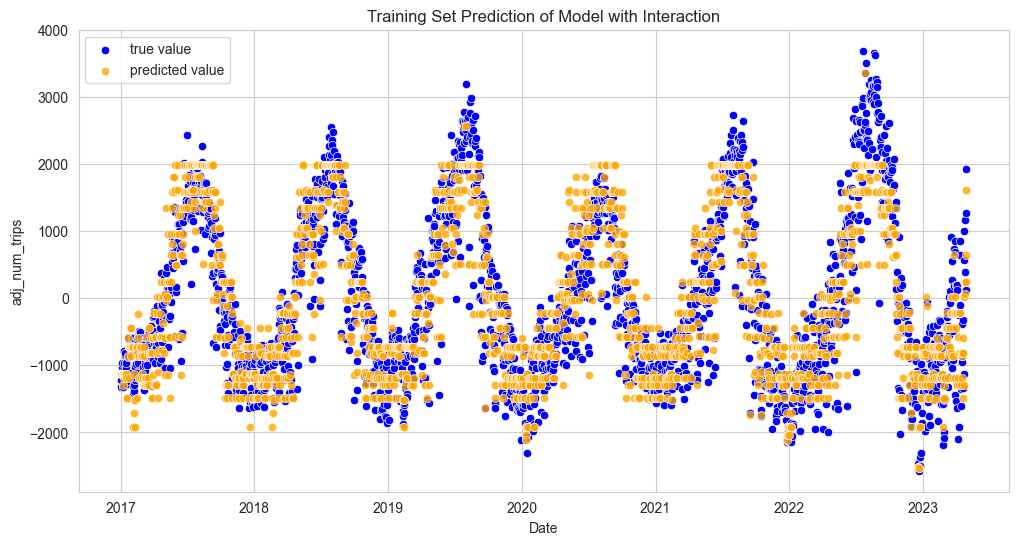

In [38]:
tree = DecisionTreeRegressor(max_depth = 6, random_state = 16)
tree.fit(bike_train[['max_temp', 'total_precip', 'snow_on_ground']], bike_train['adj_num_trips'])
pred = tree.predict(bike_train[['max_temp', 'total_precip', 'snow_on_ground']])
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x=bike_train['Date'], y=bike_train['adj_num_trips'], color='blue', ax=ax, label='true value')
sns.scatterplot(x=bike_train['Date'], y=pred, color='orange', ax=ax, alpha=0.8, label='predicted value')

plt.title('Training Set Prediction of Model with Interaction')
plt.legend()
plt.show()

The model with max depth 6 and feature set ['max_temp', 'total_precip', 'interaction_1', 'interaction_2'] has the minimum validation rmse. We will test it on the test set.

In [39]:
bike_test['interaction_1'] = bike_test['max_temp'] * bike_test['trend']
bike_test['interaction_2'] = bike_test['total_precip'] * bike_test['trend']

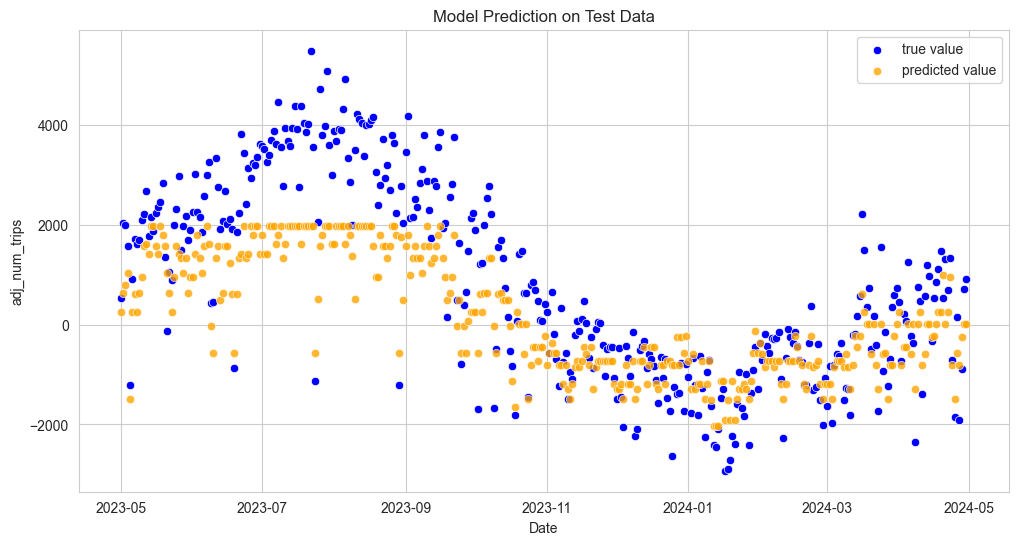

In [40]:
tree = DecisionTreeRegressor(max_depth = 6, random_state = 16)
tree.fit(bike_train[['max_temp', 'total_precip', 'snow_on_ground']], bike_train['adj_num_trips'])
pred = tree.predict(bike_test[['max_temp', 'total_precip', 'snow_on_ground']])
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x=bike_test['Date'], y=bike_test['adj_num_trips'], color='blue', ax=ax, label='true value')
sns.scatterplot(x=bike_test['Date'], y=pred, color='orange', ax=ax, alpha=0.8, label='predicted value')

plt.title('Model Prediction on Test Data')
plt.legend()
plt.show()

In [41]:
print('The rmse of the decision tree regressor model on test data is ', np.sqrt(mean_squared_error(bike_test['adj_num_trips'], pred)))

The rmse of the decision tree regressor model on test data is  1144.1849610322065


## XGBoost

Now we consider gradient boost based on decision tree regressors.

In [42]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [43]:
from xgboost import XGBRegressor

In [44]:
# specify a set of learning rate
rates = [0.01, 0.05, 0.1, 0.3, 0.5]

In [45]:
# specify a set of n_estimators
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]

In [46]:
# specify features
features = ['max_temp', 'total_precip', 'day_length', 'snow_on_ground', 'max_gust']

In [47]:
# initialize the rmse arrays
rmses_xgb_train = np.zeros((5, 2**len(features)-1, len(rates), len(n_estimators)))
rmses_xgb_val = np.zeros((5, 2**len(features)-1, len(rates), len(n_estimators)))

In [49]:
cv_count = 0
for train_index, test_index in kfold.split(bike_train):
    cv_train = bike_train.loc[train_index]
    cv_val = bike_train.loc[test_index]
    feature_count = 0
    for feature in powerset(features):
        feature = list(feature)
        if len(feature)>0:
            print(f'feature_count = {feature_count}, fitting models with {feature}')
            for i, rate in enumerate(rates):
                for j, n in enumerate(n_estimators):
                    xgb_reg = XGBRegressor(learning_rate=rate, max_depth=1, n_estimators=n, random_state=16)
                    xgb_reg.fit(cv_train[feature], cv_train['adj_num_trips'])
                    pred = xgb_reg.predict(cv_val[feature])
                    rmses_xgb_val[cv_count, feature_count, i, j] = np.sqrt(mean_squared_error(pred,cv_val['adj_num_trips']))
            feature_count += 1
    cv_count += 1

feature_count = 0, fitting models with ['max_temp']
feature_count = 1, fitting models with ['total_precip']
feature_count = 2, fitting models with ['day_length']
feature_count = 3, fitting models with ['snow_on_ground']
feature_count = 4, fitting models with ['max_gust']
feature_count = 5, fitting models with ['max_temp', 'total_precip']
feature_count = 6, fitting models with ['max_temp', 'day_length']
feature_count = 7, fitting models with ['max_temp', 'snow_on_ground']
feature_count = 8, fitting models with ['max_temp', 'max_gust']
feature_count = 9, fitting models with ['total_precip', 'day_length']
feature_count = 10, fitting models with ['total_precip', 'snow_on_ground']
feature_count = 11, fitting models with ['total_precip', 'max_gust']
feature_count = 12, fitting models with ['day_length', 'snow_on_ground']
feature_count = 13, fitting models with ['day_length', 'max_gust']
feature_count = 14, fitting models with ['snow_on_ground', 'max_gust']
feature_count = 15, fitting models 

feature_count = 15, fitting models with ['max_temp', 'total_precip', 'day_length']
feature_count = 16, fitting models with ['max_temp', 'total_precip', 'snow_on_ground']
feature_count = 17, fitting models with ['max_temp', 'total_precip', 'max_gust']
feature_count = 18, fitting models with ['max_temp', 'day_length', 'snow_on_ground']
feature_count = 19, fitting models with ['max_temp', 'day_length', 'max_gust']
feature_count = 20, fitting models with ['max_temp', 'snow_on_ground', 'max_gust']
feature_count = 21, fitting models with ['total_precip', 'day_length', 'snow_on_ground']
feature_count = 22, fitting models with ['total_precip', 'day_length', 'max_gust']
feature_count = 23, fitting models with ['total_precip', 'snow_on_ground', 'max_gust']
feature_count = 24, fitting models with ['day_length', 'snow_on_ground', 'max_gust']
feature_count = 25, fitting models with ['max_temp', 'total_precip', 'day_length', 'snow_on_ground']
feature_count = 26, fitting models with ['max_temp', 'tot

In [51]:
# compute the average of rmses
avg_rmses_xgb_val = np.zeros((2**len(features)-1, len(rates), len(n_estimators)))
for k in range(2**len(features)-1):
    for i in range(len(rates)):
        for j in range(len(n_estimators)):
            avg_rmses_xgb_val[k,i,j] = rmses_xgb_val[:,k,i,j].mean()

In [53]:
ind_val_xgb = np.unravel_index(np.argmin(avg_rmses_xgb_val, axis=None), avg_rmses_xgb_val.shape)
print(ind_val_xgb)

(25, 2, 8)


In [54]:
print(f'The minimum validation rmse occurs when features = [max_temp, total_precip, day_length, snow_on_ground], learning rate = {rates[ind_val_xgb[1]]} and n_estimator = {n_estimators[ind_val_xgb[2]]}')
print('The minimum validation rmse is ', avg_rmses_xgb_val[ind_val_xgb])

The minimum validation rmse occurs when features = [max_temp, total_precip, day_length, snow_on_ground], learning rate = 0.1 and n_estimator = 200
The minimum validation rmse is  458.8799215900937


We will test this model on testing data.

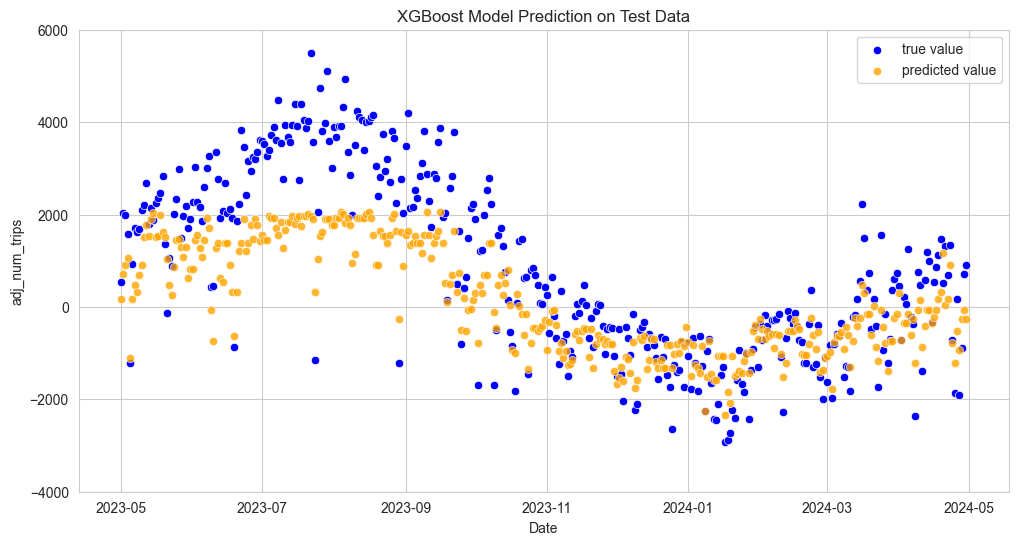

In [55]:
xgb_reg = XGBRegressor(learning_rate=0.1, max_depth=1, n_estimators=200, random_state = 16)
xgb_reg.fit(bike_train[['max_temp', 'total_precip', 'day_length', 'snow_on_ground']], bike_train['adj_num_trips'])
pred = xgb_reg.predict(bike_test[['max_temp', 'total_precip', 'day_length', 'snow_on_ground']])
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x=bike_test['Date'], y=bike_test['adj_num_trips'], color='blue', ax=ax, label='true value')
sns.scatterplot(x=bike_test['Date'], y=pred, color='orange', ax=ax, alpha=0.8, label='predicted value')
ax.set_ylim(bottom=-4000, top=6000)
plt.title('XGBoost Model Prediction on Test Data')
plt.legend()
plt.show()

In [56]:
print('The rmse of xgb boost model on test data is ', np.sqrt(mean_squared_error(pred, bike_test['adj_num_trips'])))

The rmse of xgb boost model on test data is  1162.11953021349
